# **Predicting Car Insurance Claims**
In most countries, car insurance is mandatory for vehicle owners. Insurance companies therefore spend significant resources on assessing customer risk profiles and accurately predicting the likelihood of claims. Improved risk prediction can help optimize pricing strategies, reduce unexpected losses, and maintain customer satisfaction.

**Project Objective**

This project is based on/inspired by a project provided by DataCamp (https://app.datacamp.com/learn/projects/modeling_car_insurance_claim_outcomes), and the dataset is thereby retrieved from there. The purpose of this project is to explore which factors best predict whether a car insurance customer will file a claim (`outcome = 1`) og not (`outcome = 0`). 

Specifically, the project aims to: 
- Perform exploratory data analysis (EDA) to understand the customers, by looking at their demographics, socio-economic factors, and driving-related features.
- Identify correlations and relationships between different features and claim probability. 
- Develop and evaluate predictive models (Logistic Regression and Random Forest).
- Translate technical results into business insights for risk assasment and customer segmentation.

## Initialize libraries and load dataset


In [1]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, 
                             roc_curve, auc, precision_recall_curve)
from sklearn.ensemble import RandomForestClassifier


In [2]:
# Set up visualization aesthetics
plt.style.use('seaborn-v0_8')  # Apply modern seaborn style

# Custom color palette for this project
custom_colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#7209B7', '#0F4C75']
sns.set_palette(custom_colors)

# Set global figure parameters
plt.rcParams.update({
    'figure.figsize': (8, 5),
    'font.size': 8,
    'axes.titlesize': 12,
    'axes.titleweight': 'bold',
    'axes.labelsize': 10,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'legend.fontsize': 8,
    'figure.dpi': 100
})

print("Universal aesthetics applied successfully!")


Universal aesthetics applied successfully!


In [3]:
# Load dataset
df = pd.read_csv('car_insurance.csv')

In [4]:
# Quick overview
print(f'Dataset Shape: {df.shape}')
df.head()

Dataset Shape: (10000, 18)


,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [5]:
# Information about datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

In [6]:
# Summary statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10000.0,500521.906800,290030.768758,101.000000,249638.500000,501777.000000,753974.500000,999976.000000
age,10000.0,1.489500,1.025278,0.000000,1.000000,1.000000,2.000000,3.000000
gender,10000.0,0.499000,0.500024,0.000000,0.000000,0.000000,1.000000,1.000000
credit_score,9018.0,0.515813,0.137688,0.053358,0.417191,0.525033,0.618312,0.960819
vehicle_ownership,10000.0,0.697000,0.459578,0.000000,0.000000,1.000000,1.000000,1.000000
married,10000.0,0.498200,0.500022,0.000000,0.000000,0.000000,1.000000,1.000000
children,10000.0,0.688800,0.463008,0.000000,0.000000,1.000000,1.000000,1.000000
postal_code,10000.0,19864.548400,18915.613855,10238.000000,10238.000000,10238.000000,32765.000000,92101.000000
annual_mileage,9043.0,11697.003207,2818.434528,2000.000000,10000.000000,12000.000000,14000.000000,22000.000000
speeding_violations,10000.0,1.482900,2.241966,0.000000,0.000000,0.000000,2.000000,22.000000


In [7]:
# Missing values
df.isna().sum().sort_values(ascending=False)

credit_score           982
annual_mileage         957
id                       0
children                 0
past_accidents           0
duis                     0
speeding_violations      0
vehicle_type             0
postal_code              0
married                  0
age                      0
vehicle_year             0
vehicle_ownership        0
income                   0
education                0
driving_experience       0
gender                   0
outcome                  0
dtype: int64

## **Summary of Initial Overview**
The dataset contains **10 000 car insurance customers** described across **17 variables** (excluding the unique ID). The target variable is `outcome`, indicating whether the customer filed a claim (`1`) or not (`0`).

Two variables have missing values (`credit_score` and `annual_mileage`), each with approximately **10% missing entries**. All other columns are complete.

The dataset is a mix of continuous variables, binary indicators, and grouped categorical features:
- **Demographics**  
  - `age`: 0 = 16–25, 1 = 26–39, 2 = 40–64, 3 = 65+  
  - `gender`: 0 = Female, 1 = Male  
  - `married`: 0 = Not married, 1 = Married  
  - `children`: Number of children  

- **Socio-economic status**  
  - `driving_experience`: 0 = 0–9y, 1 = 10–19y, 2 = 20–29y, 3 = 30y+  
  - `education`: 0 = No education, 1 = High school, 2 = University  
  - `income`: 0 = Poverty, 1 = Working class, 2 = Middle class, 3 = Upper class  
  - `credit_score`: Continuous (0–1)  

- **Vehicle information**  
  - `vehicle_ownership`: 0 = Financing/Leasing, 1 = Own  
  - `vehicle_year`: 0 = Before 2015, 1 = 2015 or later  
  - `vehicle_type`: 0 = Sedan, 1 = Sports car  

- **Driving history**  
  - `speeding_violations`: Number of speeding violations  
  - `duis`: Number of DUI incidents  
  - `past_accidents`: Number of past accidents  
  - `annual_mileage`: Continuous (miles driven per year)  

Some features, such as `postal_code`, are unlikely to have strong predictive value, but this will be validated during the EDA phase.  
The next step will be to **handle missing values** in the dataset before moving to deeper exploratory analysis.  

### Handle missing values
Before dealing with the missing values, it is a good idea to check whether they are systematically related to the target variable (`outcome`). If the probability of missingness differs across claim vs. no-claim groups, this could bias the analysis. 

In [8]:
# Check if missingness is related to the target variable

# Create indicator columns for missing values
df['credit_score_na'] = df['credit_score'].isna().astype(int)
df['annual_mileage_na'] = df['annual_mileage'].isna().astype(int)

# Compare missingness between claim and no-claim groups
na_check = df.groupby('outcome')[['credit_score_na', 'annual_mileage_na']].mean()
na_check

,credit_score_na,annual_mileage_na
outcome,,
0.0,0.098733,0.092326
1.0,0.097032,0.103096


The missingness is around **10%** in both groups and does not differ significantly between customers who filed a claim (`outcome = 1`) and those who did not (`outcome = 0`).  
This indicates that the missing values are **random** and not related to the target variable. Therefore, median imputation is a safe and robust choice.  

In [9]:
# Impute missing values with the median
df['credit_score'].fillna(df['credit_score'].median(), inplace=True)
df['annual_mileage'].fillna(df['annual_mileage'].median(), inplace=True)

# Verify that missing values are imputed
df.isna().sum().sort_values(ascending=False)

id                     0
age                    0
credit_score_na        0
outcome                0
past_accidents         0
duis                   0
speeding_violations    0
vehicle_type           0
annual_mileage         0
postal_code            0
children               0
married                0
vehicle_year           0
vehicle_ownership      0
credit_score           0
income                 0
education              0
driving_experience     0
gender                 0
annual_mileage_na      0
dtype: int64

## **Exploratory Data Analysis**

### **Target Distribution**
The first step is to look at the distribution of the target variable (`outcome`) to understand the class balance.


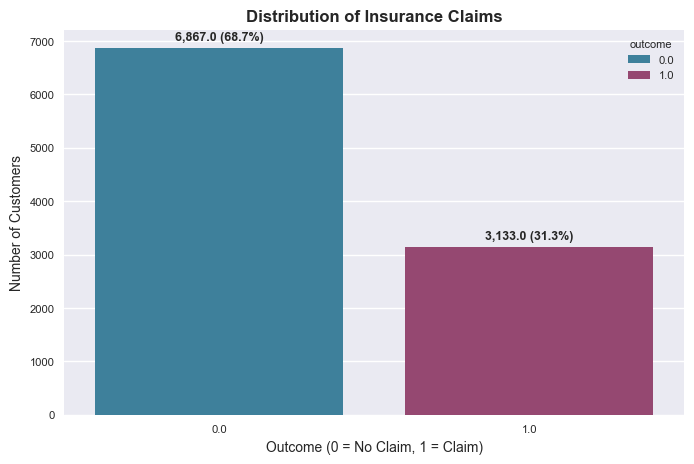

Claim rate: 31.33%


In [10]:
# Distribution of the target variable 'outcome'
ax = sns.countplot(x="outcome", data=df, hue="outcome")

# Total number of observations
total = len(df)

# Annotate each bar with count and percentage
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percent = 100 * height / total
        ax.annotate(
            f"{height:,} ({percent:.1f}%)",
            (p.get_x() + p.get_width() / 2., height),
            ha="center", va="center",
            xytext=(0, 8), textcoords="offset points",
            fontsize=9, fontweight="bold"
        )

plt.title("Distribution of Insurance Claims")
plt.xlabel("Outcome (0 = No Claim, 1 = Claim)")
plt.ylabel("Number of Customers")
plt.show()

# Claim rate
claim_rate = df["outcome"].mean() * 100
print(f"Claim rate: {claim_rate:.2f}%")


**Insights**  
- Approximately **31% of customers filed an insurance claim**.  
- The dataset is **slightly imbalanced** (more "No Claim" customers than "Claim" customers).  
- This imbalance is not severe, but it is worth keeping in mind when evaluating models, as recall/precision trade-offs may be important.  


### **Univariate Distribution**
Before analyzing relationships, we first explore the distribution of individual features. This helps identify skewness, potential outliers, and how variables might contribute to predicting claims.  

#### **Continuous Features**

In [11]:
# Store the continuous features
cont_features = ['credit_score', 'annual_mileage']

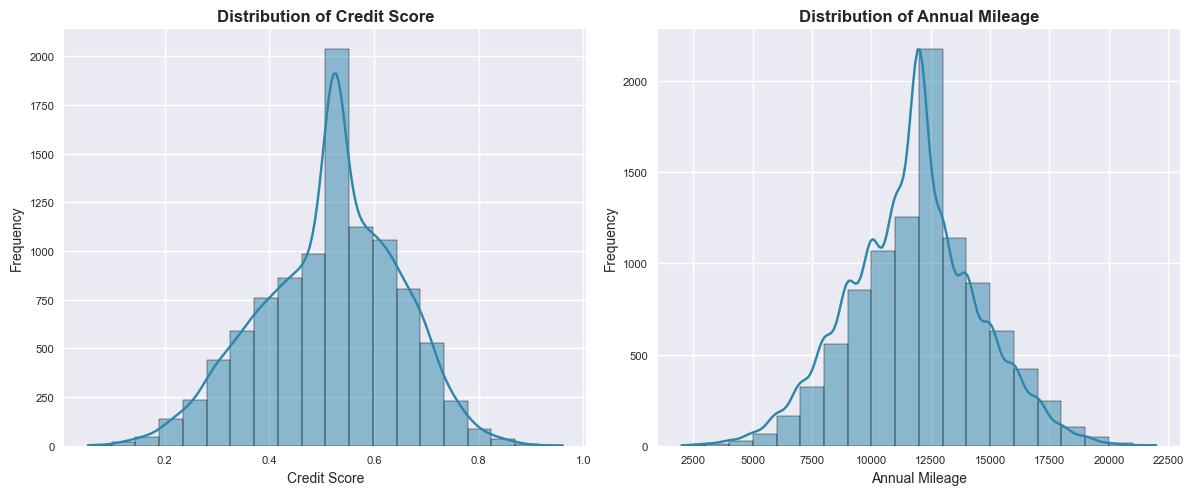

In [12]:
# Plot Continuous Features
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, feature in enumerate(cont_features):
    sns.histplot(data=df, x=feature, bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature.replace('_', ' ').title()}")
    axes[i].set_xlabel(feature.replace("_", " ").title())
    axes[i].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

**Insights – Continuous features**  
- **Credit Score**: Approximately normal distribution centered around 0.5, no extreme outliers. Matches expectations of customers clustered in the mid-range.  
- **Annual Mileage**: Strong peak around 10–13k miles, with some drivers going up to 22k. Skewed right due to a few high-mileage drivers.  


#### **Discrete Features**

In [13]:
# Store the discrete features
disc_features = ['speeding_violations', 'duis', 'past_accidents']

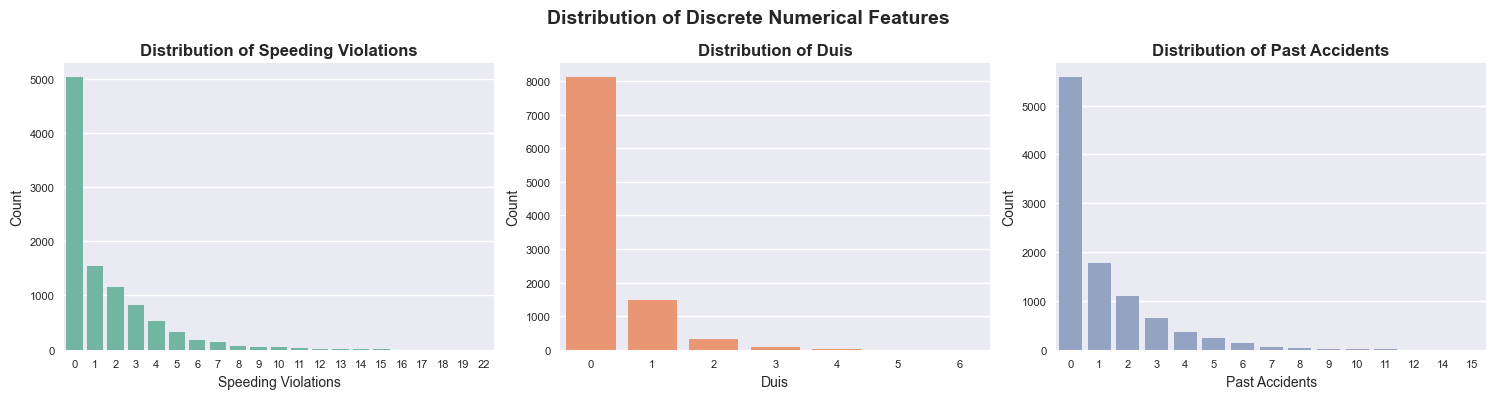

In [14]:
# Plot Discrete Features
fig, axes = plt.subplots(1, 3, figsize=(15,4))
colors = ["#66c2a5", "#fc8d62", "#8da0cb"]
for i, feature in enumerate(disc_features):
    sns.countplot(x=feature, data=df, color=colors[i], ax=axes[i])
    axes[i].set_title(f"Distribution of {feature.replace('_', ' ').title()}")
    axes[i].set_xlabel(feature.replace("_", " ").title())
    axes[i].set_ylabel("Count")
plt.suptitle("Distribution of Discrete Numerical Features", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

**Insights – Discrete features**  
- **Speeding Violations**: Most customers have 0 violations, but a long right tail suggests a few risky drivers.  
- **DUIs**: Vast majority have no DUIs; only a small minority with 1–2. Predictive value may be limited alone, but strong signal when combined with other variables.  
- **Past Accidents**: Similar to speeding – skewed towards 0, with a few repeat offenders. Strong potential as a risk predictor given the nature of insurance.  

All variables show **skewed distributions**, meaning they are dominated by “safe” customers, with a small minority driving much of the risk.  


### **Bivariate with outcome**
We now analyze how claim probability (`outcome = 1`) varies across different feature groups.  


In [16]:
# Helper function to annotate bars
def annotate_bars(ax, fmt="{:.1f}%"):
    for p in ax.patches:
        height = p.get_height()
        if height > 0.001:
            ax.annotate(fmt.format(height * 100),
                        (p.get_x() + p.get_width() / 2., height),
                        ha="center", va="bottom",
                        fontsize=9, fontweight="bold")

#### **Demograpichs**

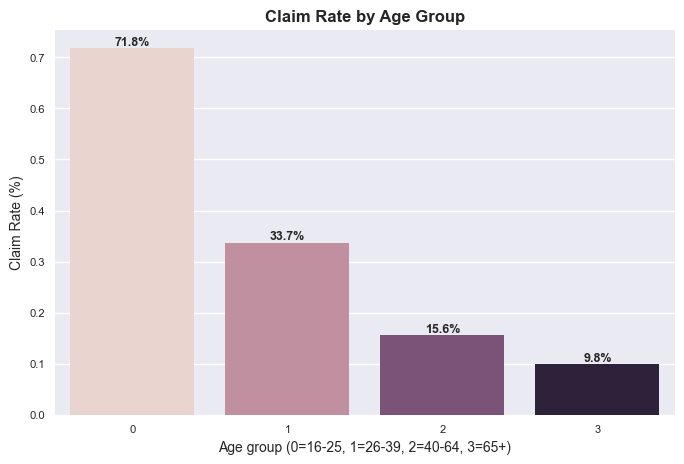

In [17]:
# Age vs Outcome
ax = sns.barplot(x="age", y="outcome", data=df, estimator="mean", hue="age", errorbar=None)
annotate_bars(ax)
plt.title("Claim Rate by Age Group")
plt.xlabel("Age group (0=16-25, 1=26-39, 2=40-64, 3=65+)")
plt.ylabel("Claim Rate (%)")
plt.legend([],[], frameon=False)
plt.show()

**Insights**  
- Clear age gradient: younger customers have the highest claim rates, which steadily decrease with age.  
- Suggests that age is a strong predictor of insurance risk.  


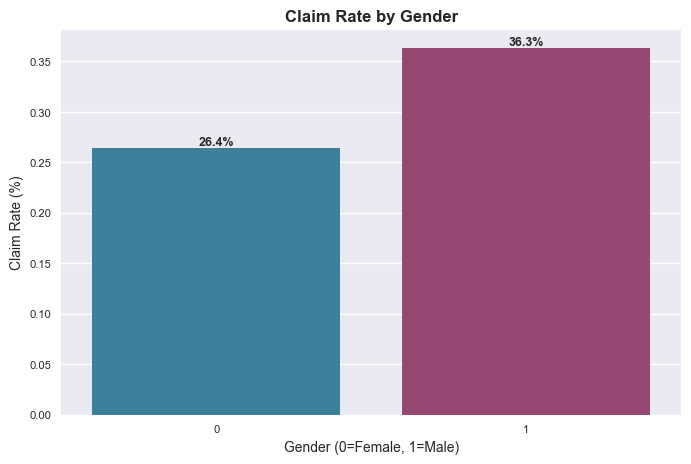

In [18]:
# Gender vs. Outcome
ax = sns.barplot(x="gender", y="outcome", data=df, estimator="mean", hue="gender", errorbar=None)
annotate_bars(ax)
plt.title("Claim Rate by Gender")
plt.xlabel("Gender (0=Female, 1=Male)")
plt.ylabel("Claim Rate (%)")
plt.legend([],[], frameon=False)
plt.show()

**Insights**  
- Males show a slightly higher claim rate than females.  
- The difference is not extreme but aligns with risk-taking tendencies between genders.  


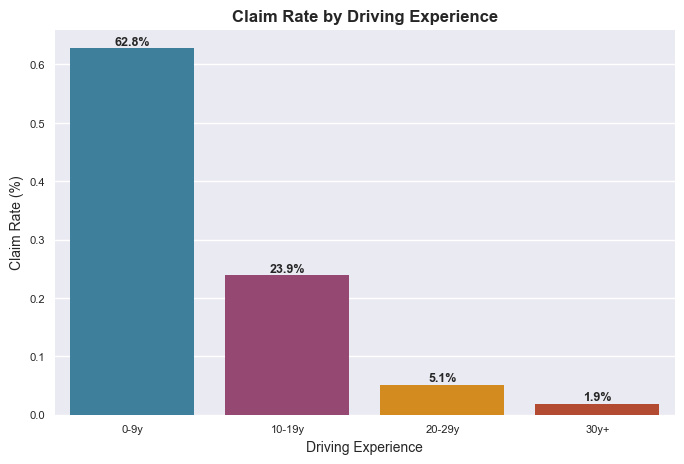

In [86]:
# Driving Experience vs. Outcome
ax = sns.barplot(x="driving_experience", y="outcome", data=df, estimator="mean", 
                 hue="driving_experience", errorbar=None)
annotate_bars(ax)
plt.title("Claim Rate by Driving Experience")
plt.xlabel("Driving Experience")
plt.ylabel("Claim Rate (%)")
plt.legend([],[], frameon=False)
plt.show()


**Insights**  
- Strongly mirrors the age feature: less experienced drivers have much higher claim rates.  
- Age and driving experience are likely correlated; combined analysis may reveal redundancy.  

---

#### **Socioeconomic**

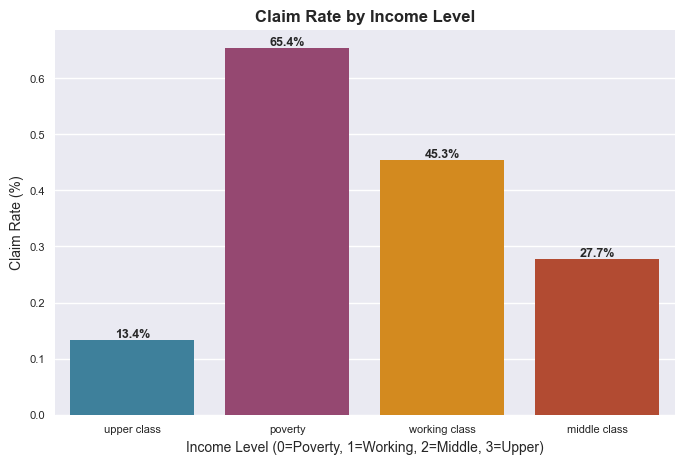

In [20]:
# Income vs. Outcome
ax = sns.barplot(x="income", y="outcome", data=df, estimator="mean",
                 hue="income", errorbar=None)
annotate_bars(ax)
plt.title("Claim Rate by Income Level")
plt.xlabel("Income Level (0=Poverty, 1=Working, 2=Middle, 3=Upper)")
plt.ylabel("Claim Rate (%)")
plt.legend([], [], frameon=False)
plt.show()


**Insights**  
- Clear socioeconomic gradient: poverty group has the highest claim rate, while upper class has the lowest.  
- Suggests financial stability is inversely related to insurance risk.  

---

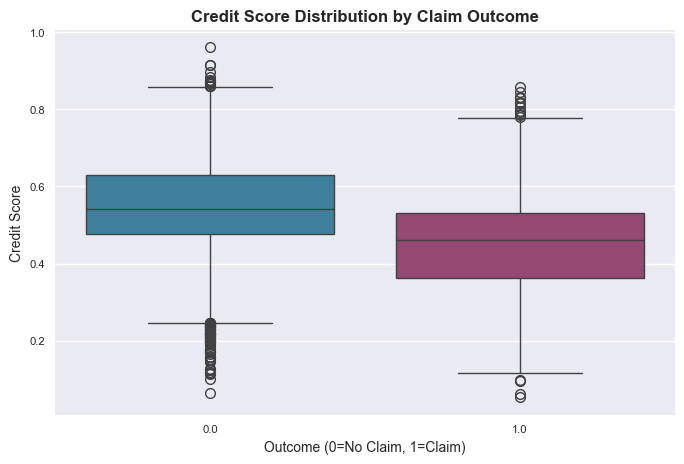

In [21]:
# Credit Score vs. Outcome
sns.boxplot(x="outcome", y="credit_score", data=df, hue="outcome")
plt.title("Credit Score Distribution by Claim Outcome")
plt.xlabel("Outcome (0=No Claim, 1=Claim)")
plt.ylabel("Credit Score")
plt.legend([], [], frameon=False)
plt.show()


**Insights**  
- Customers who filed claims generally have lower credit scores.  
- Credit score appears to be a strong **negative risk indicator** (higher score → lower claim probability).  

---

#### **Vehicle-related Features**

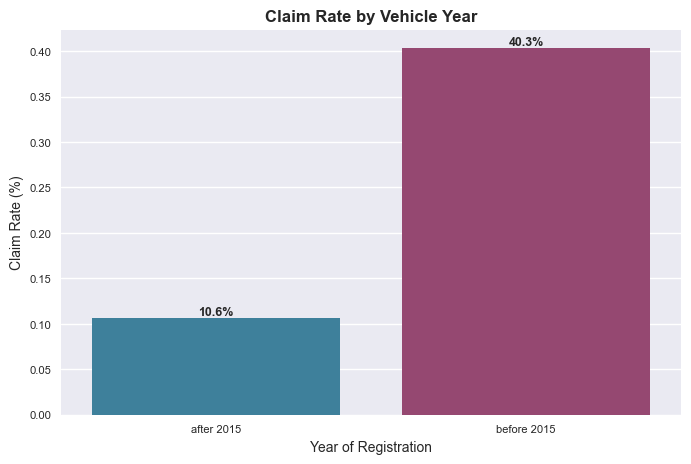

In [22]:
# Vehicle registration year vs. Outcome
ax = sns.barplot(x="vehicle_year", y="outcome", data=df, estimator="mean",
                 hue="vehicle_year", errorbar=None)
annotate_bars(ax)
plt.title("Claim Rate by Vehicle Year")
plt.xlabel("Year of Registration")
plt.ylabel("Claim Rate (%)")
plt.legend([], [], frameon=False)
plt.show()

**Insights**

Older cars (before 2015) have a much higher claim rate than newer cars. Likely linked to age-related wear or fewer safety features.



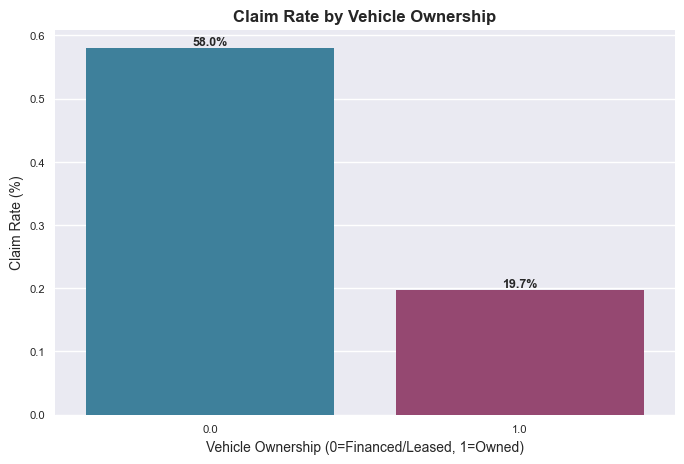

In [23]:
# Vehicle Ownership vs. Outcome
ax = sns.barplot(x="vehicle_ownership", y="outcome", data=df, estimator="mean",
                 hue="vehicle_ownership", errorbar=None)
annotate_bars(ax)
plt.title("Claim Rate by Vehicle Ownership")
plt.xlabel("Vehicle Ownership (0=Financed/Leased, 1=Owned)")
plt.ylabel("Claim Rate (%)")
plt.legend([], [], frameon=False)
plt.show()


**Insights**

Financed/leased cars have a significantly higher claim rate than owned vehicles. Could reflect riskier customer segments or different usage patterns. 



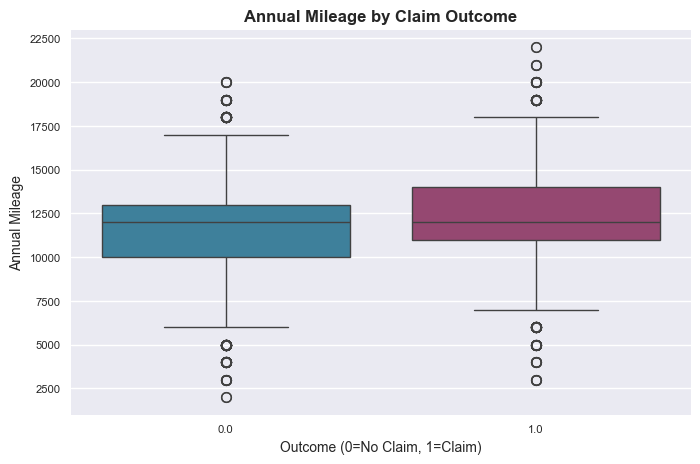

In [24]:
# Annual Mileage vs. Outcome
sns.boxplot(x="outcome", y="annual_mileage", data=df, hue="outcome")
plt.title("Annual Mileage by Claim Outcome")
plt.xlabel("Outcome (0=No Claim, 1=Claim)")
plt.ylabel("Annual Mileage")
plt.legend([], [], frameon=False)
plt.show()

**Insights**

Customers who file claims tend to drive more on average, suggesting higher exposure (more time on the road = higher accident probability).


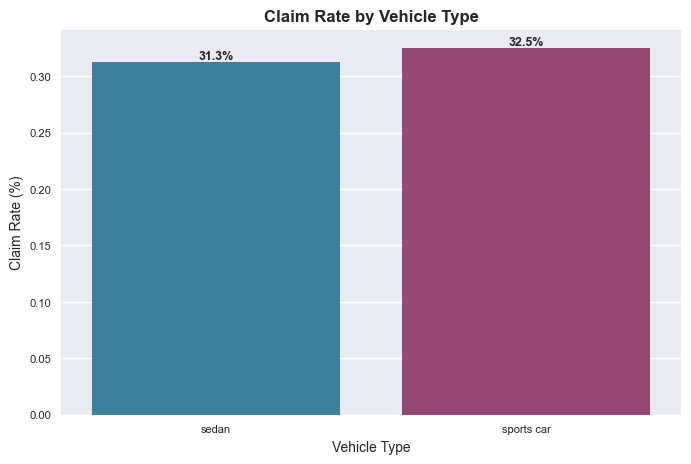

In [25]:
# Vehicle Ownership vs. Outcome
ax = sns.barplot(x="vehicle_type", y="outcome", data=df, estimator="mean",
                 hue="vehicle_type", errorbar=None)
annotate_bars(ax)
plt.title("Claim Rate by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Claim Rate (%)")
plt.legend([], [], frameon=False)
plt.show()

**Insights**
- Claim rates are very similar between sedans (31.3%) and sports cars (32.5%).
- Contrary to expectations, sports cars are not dramatically riskier than sedans in this dataset.
- Suggests that vehicle type alone is not a strong predictor of claims – other factors (like age, experience, mileage) are likely more important.

---

#### **Behavioral Features**

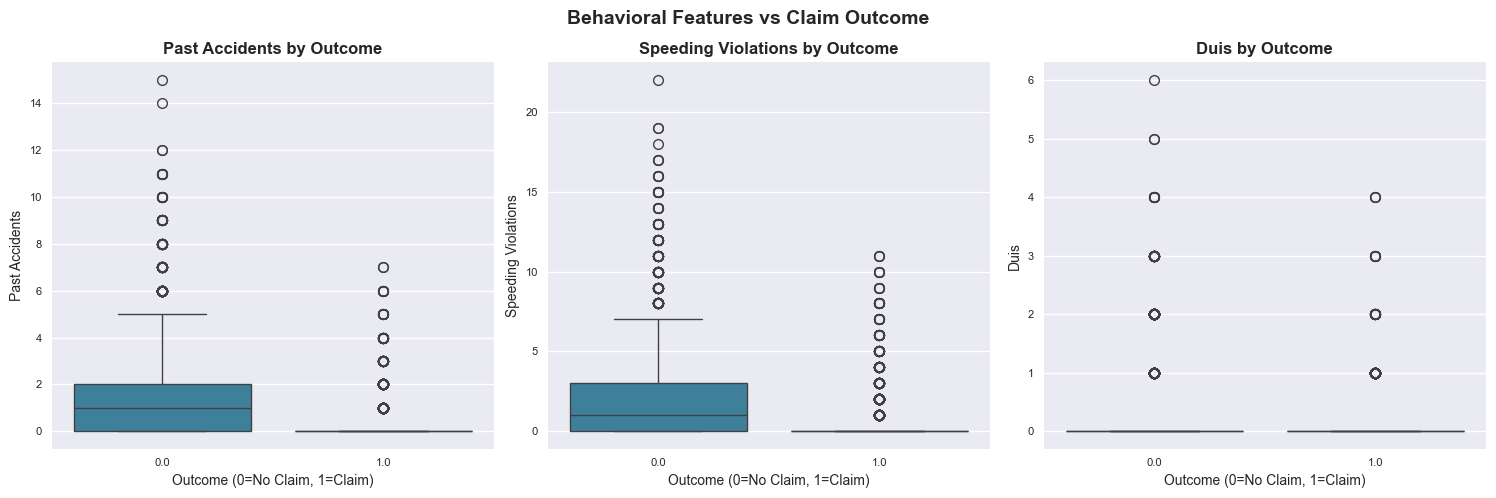

In [ ]:
# Behavioral features by outcome
behavioral_features = ["past_accidents", "speeding_violations", "duis"]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, feature in enumerate(behavioral_features):
    sns.boxplot(x="outcome", y=feature, data=df, hue="outcome", ax=axes[i])
    axes[i].set_title(f"{feature.replace('_', ' ').title()} by Outcome")
    axes[i].set_xlabel("Outcome (0=No Claim, 1=Claim)")
    axes[i].set_ylabel(feature.replace("_", " ").title())
    axes[i].legend([], [], frameon=False)

plt.suptitle("Behavioral Features vs Claim Outcome", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


**Insights**

- Across past accidents, speeding violations, and DUIs, customers without claims tend to show slightly higher values than those who file claims.
- This pattern can be seen as counterintuitive, since we would normally expect risky behavior to increase the likelihood of filing a claim.
- Possible explanations include:
  - Data definition bias: not all accidents or violations lead to an insurance claim.
  - Confounding factors: e.g., younger or less experienced drivers may combine riskier behavior with lower reporting of claims.
  - Insurance practices: some customers may choose to not claim for smaller incidents.

---

### **Multivariate analysis**

#### **Correlation Matrix**

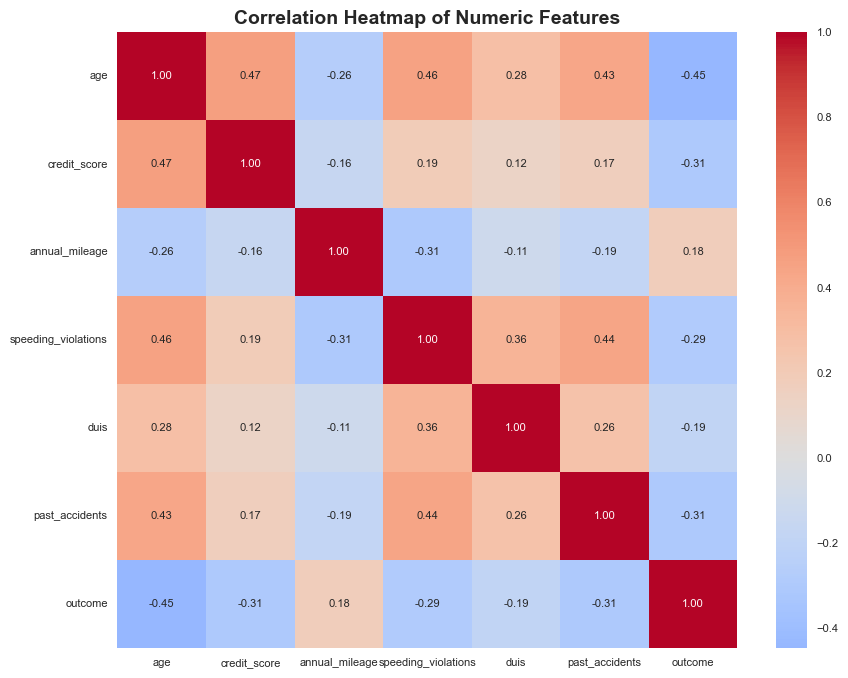

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['age', 'credit_score', 'annual_mileage', 'speeding_violations', 'duis', 'past_accidents', 'outcome']].corr(), 
            annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features", fontsize=14, fontweight="bold")
plt.show()


**Insights**
- There isn't any strong correlations between the numerical features overall - low risk of multicollinearity
- The "strongest" correlations are between `age`and `credit_score`, `past_accidents` and `duis`, `speeding_violations` and `age`
- `outcome` has mostly negative correlations, with the highest negative correlation towards `age`. This negative correlation is not unexpected given what we've seen.

---

#### **Grouped Barplot: Age x Gender**

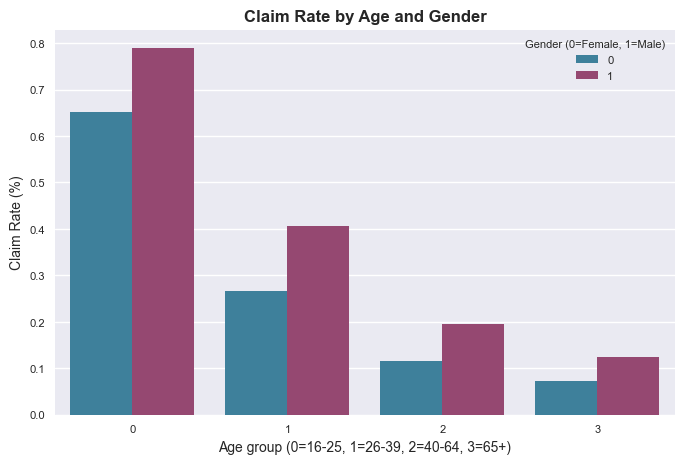

In [36]:
# Grouped barplot: Age x Gender
sns.barplot(
    x="age", y="outcome", hue="gender", data=df,
    estimator=lambda x: sum(x)/len(x), errorbar=None
)
plt.title("Claim Rate by Age and Gender")
plt.xlabel("Age group (0=16-25, 1=26-39, 2=40-64, 3=65+)")
plt.ylabel("Claim Rate (%)")
plt.legend(title="Gender (0=Female, 1=Male)")
plt.show()


**Insights**

- Age dominates the risk pattern: younger drivers have far higher claim rates.
- Males have slightly higher rates in each group, but the effect of age is stronger.

---


#### **Crosstab Heatmap: Age x Driving Experience**

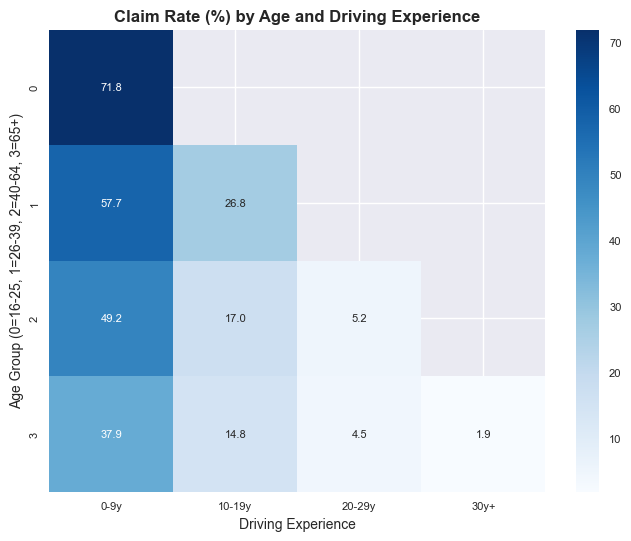

In [38]:
# Crosstab Heatmap: Age x Driving Experience
age_exp = pd.crosstab(df["age"], df["driving_experience"], values=df["outcome"], aggfunc="mean")
plt.figure(figsize=(8,6))
sns.heatmap(age_exp*100, annot=True, fmt=".1f", cmap="Blues")
plt.title("Claim Rate (%) by Age and Driving Experience")
plt.xlabel("Driving Experience")
plt.ylabel("Age Group (0=16-25, 1=26-39, 2=40-64, 3=65+)")
plt.show()

**Insights**

- Highest risk = young drivers with little experience.
- Risk drops significantly with age and experience -> overlapping but not identical effects.

---

#### **Crosstab Heatmap: Age x Income**

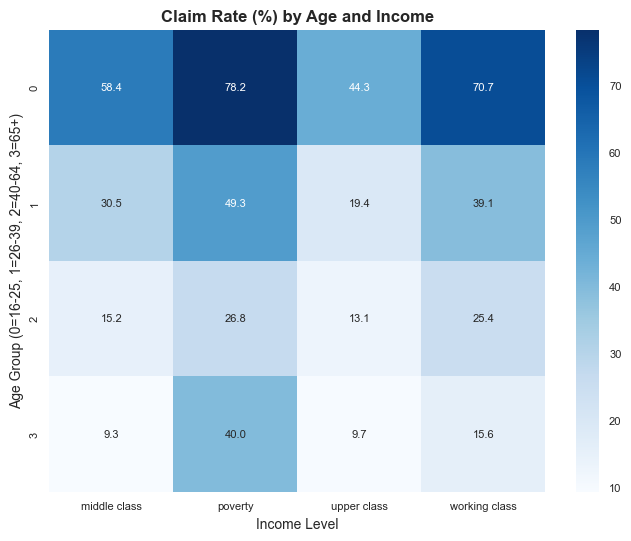

In [40]:
# Crosstab Heatmap: Age x Income
age_income = pd.crosstab(df["age"], df["income"], values=df["outcome"], aggfunc="mean")
plt.figure(figsize=(8,6))
sns.heatmap(age_income*100, annot=True, fmt=".1f", cmap="Blues")
plt.title("Claim Rate (%) by Age and Income")
plt.xlabel("Income Level")
plt.ylabel("Age Group (0=16-25, 1=26-39, 2=40-64, 3=65+)")
plt.show()


**Insights**

- Highest risk = youngest customers in lowest income category (~80% claim rate).
- Working class youth also have high risk, though slightly lower than poverty group.
- Youth itself is the dominant driver of risk; income moderates but does not overturn the pattern. 

---

#### **Crosstab Heatmap: Age x Past Accidents**

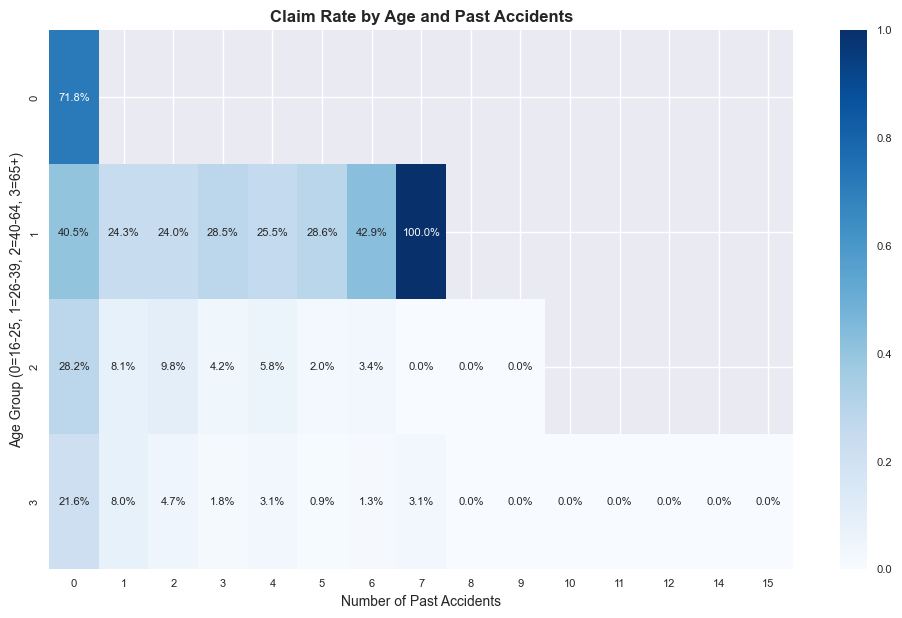

In [41]:
### Crosstab Heatmap: Age x Past Accidents
accident_age = df.groupby(["age", "past_accidents"])["outcome"].mean().unstack()
plt.figure(figsize=(12,7))
sns.heatmap(accident_age, annot=True, fmt=".1%", cmap="Blues")
plt.title("Claim Rate by Age and Past Accidents")
plt.xlabel("Number of Past Accidents")
plt.ylabel("Age Group (0=16-25, 1=26-39, 2=40-64, 3=65+)")
plt.show()


**Insights**

- For young drivers, even a small history of accidents greatly increases claim probability.
- For older drivers, past accidents are less predictive of filing a claim.

---

#### **Crosstab Heatmap: Driving Experience x Speeding Violations**

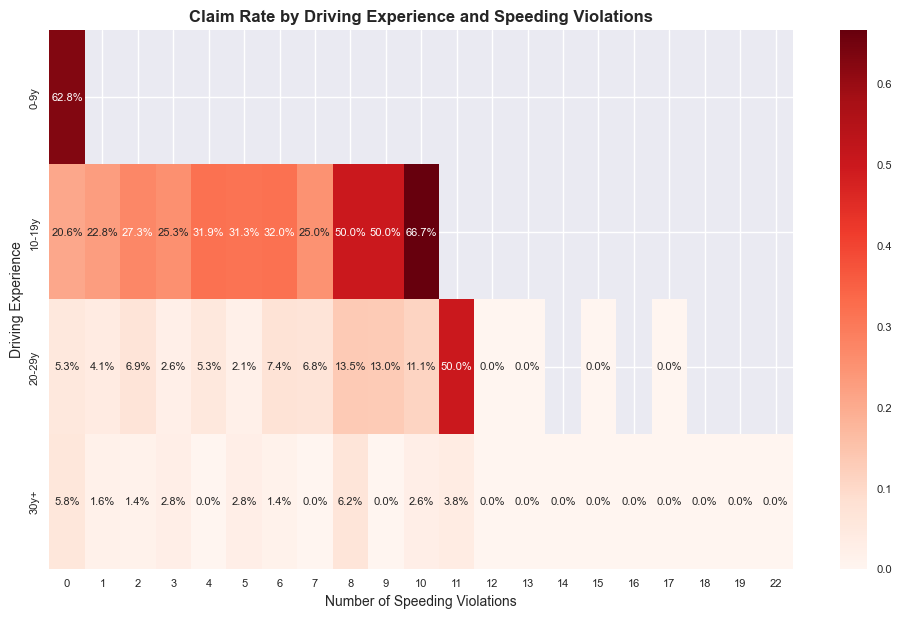

In [43]:
# Crosstab Heatmap: Driving Experience x Speeding Violations
violation_exp = df.groupby(["driving_experience", "speeding_violations"])["outcome"].mean().unstack()
plt.figure(figsize=(12,7))
sns.heatmap(violation_exp, annot=True, fmt=".1%", cmap="Reds")
plt.title("Claim Rate by Driving Experience and Speeding Violations")
plt.xlabel("Number of Speeding Violations")
plt.ylabel("Driving Experience")
plt.show()


**Insights**

- Inexperienced drivers with many violations = high risk.
- For experienced drivers, violations are less impactful on claim probability.

---

### **Sanity Check: Customer Distribution by Age Group**
To ensure the observed patterns were not driven by skewed group sizes, I wanted to double check the distribution of customers across age groups and validate the claim rates accordingly.

In [54]:
# Aggregate customers and claims by age
age_summary = df.groupby("age").agg(
    customers=("outcome", "count"),
    claims=("outcome", "sum"),
    claim_rate=("outcome", "mean")
).reset_index()

# Calculate claim rate
age_summary["Claim_Rate_%"] = (age_summary["claims"] / age_summary["customers"]) * 100

age_summary.rename(columns={
    "age": "Age Group (0=16-25, 1=26-39, 2=40-64, 3=65+)",
    "customers": "Number of Customers",
    "claims": "Number of Claims"
}, inplace=True)

display(age_summary)


,"Age Group (0=16-25, 1=26-39, 2=40-64, 3=65+)",Number of Customers,Number of Claims,claim_rate,Claim_Rate_%
0,0,2016,1448.0,0.718254,71.825397
1,1,3063,1032.0,0.336925,33.692458
2,2,2931,457.0,0.155919,15.591948
3,3,1990,196.0,0.098492,9.849246


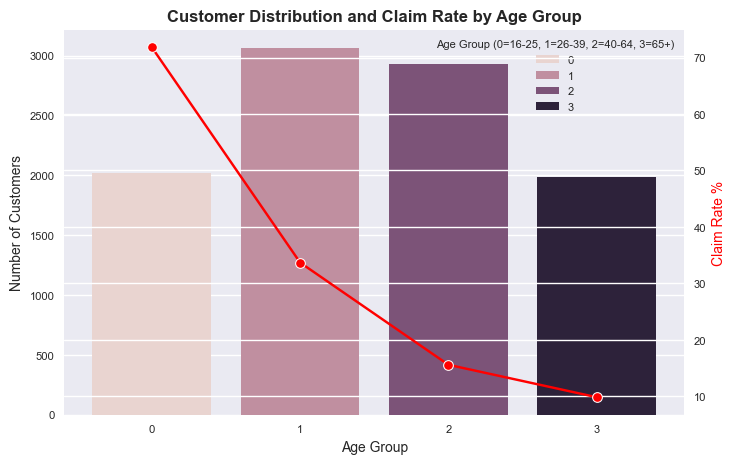

In [66]:
# Plot combined bar (customers) and line (claim rate)
fig, ax1 = plt.subplots(figsize=(8,5))

# Barplot for customer counts
sns.barplot(x="Age Group (0=16-25, 1=26-39, 2=40-64, 3=65+)", 
            y="Number of Customers", 
            data=age_summary, 
            hue = "Age Group (0=16-25, 1=26-39, 2=40-64, 3=65+)", 
            ax=ax1)
ax1.set_ylabel("Number of Customers")
ax1.set_xlabel("Age Group")

# Add second axis for claim rate
ax2 = ax1.twinx()
sns.lineplot(x="Age Group (0=16-25, 1=26-39, 2=40-64, 3=65+)", 
             y="Claim_Rate_%", 
             data=age_summary, 
             marker="o", 
             color="red", 
             ax=ax2)

ax2.set_ylabel("Claim Rate %", color="red")

plt.title("Customer Distribution and Claim Rate by Age Group")
plt.show()

**Insights**
- This check shows that the dataset is not dominated by only one age group.
- Groups 1 (26-39) and 2 (40-64) have the largest number of customers, while the youngest (0 = 16–25) and oldest (3 = 65+) are smaller segments.
- Despite being a smaller group, the youngest customers (16–25) have a very high claim rate (≈72%), confirming earlier findings.
- The decreasing claim rate with age is therefore not just an artifact of uneven group sizes — it reflects a real underlying pattern.

---

### **Feature Importance**
As a last part of the Exploratory Data Analysis, I've analyzed which features show the strongest linear relationship with the target variable. Correlation does not imply causation, but could give a good indication of which variables are most influential. 

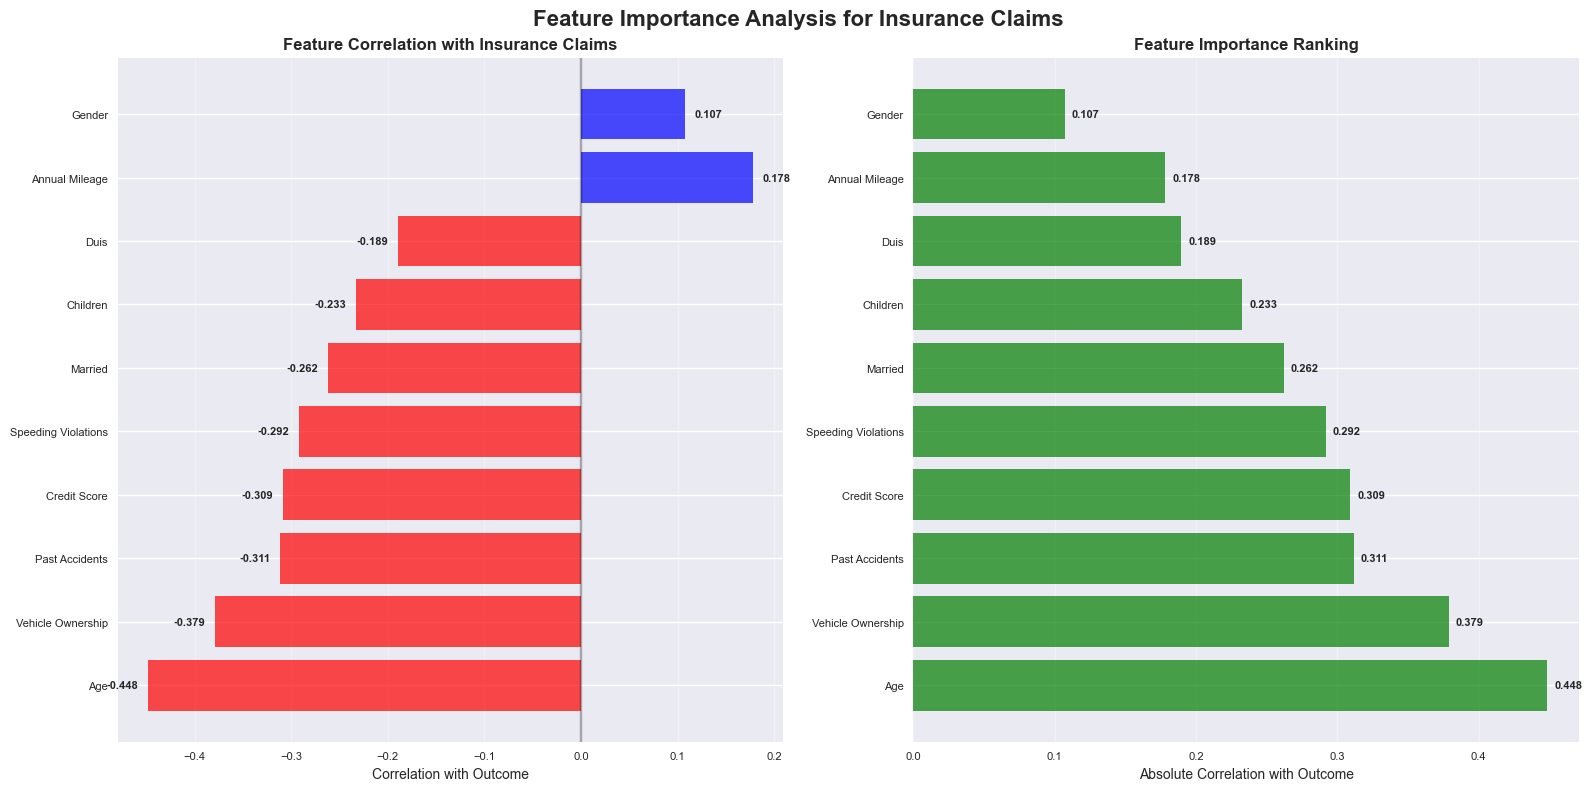


=== FEATURE IMPORTANCE SUMMARY ===
Top 5 most important features:
1. Age: 0.448 (decreases claim probability)
2. Vehicle Ownership: 0.379 (decreases claim probability)
3. Past Accidents: 0.311 (decreases claim probability)
4. Credit Score: 0.309 (decreases claim probability)
5. Speeding Violations: 0.292 (decreases claim probability)


In [75]:
# Feature importance analysis based on correlation

# Define features to test
numerical_features = [
    'age', 'gender', 'credit_score', 'vehicle_ownership', 
    'married', 'children', 'annual_mileage', 
    'speeding_violations', 'duis', 'past_accidents'
]

# Calculate correlations
correlations = []
for feature in numerical_features:
    corr = df[feature].corr(df['outcome'])
    correlations.append((feature, abs(corr), corr))

# Sort by absolute correlation strength
correlations.sort(key=lambda x: x[1], reverse=True)

# Unpack for plotting
features, abs_corrs, corrs = zip(*correlations)
labels = [f.replace('_', ' ').title() for f in features]
colors = ['red' if c < 0 else 'blue' for c in corrs]

# Create plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# 1. Correlation with direction
bars = ax1.barh(range(len(features)), corrs, color=colors, alpha=0.7)
ax1.set_yticks(range(len(features)))
ax1.set_yticklabels(labels)
ax1.set_xlabel('Correlation with Outcome')
ax1.set_title('Feature Correlation with Insurance Claims')
ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)
ax1.grid(axis='x', alpha=0.3)

# Annotate bars
for bar, corr in zip(bars, corrs):
    ax1.text(corr + (0.01 if corr > 0 else -0.01), 
             bar.get_y() + bar.get_height()/2, 
             f'{corr:.3f}', 
             ha='left' if corr > 0 else 'right', 
             va='center', fontweight='bold')

# 2. Absolute correlation ranking
bars2 = ax2.barh(range(len(features)), abs_corrs, color='green', alpha=0.7)
ax2.set_yticks(range(len(features)))
ax2.set_yticklabels(labels)
ax2.set_xlabel('Absolute Correlation with Outcome')
ax2.set_title('Feature Importance Ranking')
ax2.grid(axis='x', alpha=0.3)

# Annotate bars
for bar, abs_corr in zip(bars2, abs_corrs):
    ax2.text(abs_corr + 0.005, 
             bar.get_y() + bar.get_height()/2, 
             f'{abs_corr:.3f}', 
             ha='left', va='center', fontweight='bold')

plt.suptitle('Feature Importance Analysis for Insurance Claims', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Print summary
print("\n=== FEATURE IMPORTANCE SUMMARY ===")
print("Top 5 most important features:")
for i, (feature, abs_corr, corr) in enumerate(correlations[:5]):
    direction = "increases" if corr > 0 else "decreases"
    print(f"{i+1}. {feature.replace('_', ' ').title()}: {abs_corr:.3f} ({direction} claim probability)")



**Results & Insights**

- Top 5 strongest predictors of claim probability:
  1. Age (–0.448): Younger customers have significantly higher claim rates.
  2. Vehicle Ownership (–0.379): Customers who own their vehicles are less likely to file claims compared to those leasing/financing.
  3. Past Accidents (–0.311): Surprisingly, more past accidents are associated with fewer current claims in this dataset.
  4. Credit Score (–0.309): Lower credit scores are associated with a higher probability of filing claims.
  5. Speeding Violations (–0.292): More violations are correlated with fewer claims, similar to past accidents.

- Age is by far the most dominant risk factor, aligning with earlier univariate and multivariate analyses.
- Vehicle ownership plays a strong role: owned cars indicate stability and responsibility, reducing risk.
- Behavioral variables (accidents, violations, DUIs) show unexpected negative correlations. This suggests that claim behavior may not map directly onto risky driving history, possibly due to reporting biases or insurance incentives.
- Credit score acts as a financial risk proxy, supporting its inclusion in predictive modeling.

### **EDA Summary**
The exploratory data analysis provided a comprehensive (and at maybe a bit repetitive) overview of how different features relate to insurance claim behavior:
- **Demographics**: Younger customers (16–25) and those with little driving experience (0–9 years) have by far the highest claim rates, while older and more experienced customers represent the lowest risk. Gender shows minor differences, with males being slightly more likely to file claims.
- **Socioeconomic factors**: Education, income, and credit score play a moderate role. Customers with low income or no education, as well as those with low credit scores, are more likely to submit claims.
- **Vehicle-related factors**: Cars registered before 2015 and financed vehicles are more strongly associated with claims compared to newer and fully owned cars. Annual mileage also matters — claimants tend to drive more on average.
- **Driving history**: Counterintuitively, customers with more speeding violations, DUIs, and past accidents are less likely to file claims in this dataset. In real-world data, we would expect the opposite. This anomaly could stem from the dataset’s construction, reporting differences, or sampling bias.
- **Multivariate insights**: Interactions highlight that risk is not necessarily driven by single factors alone. Age combined with experience or income creates a clearer risk profile: young customers with low income or little driving experience are consistently the riskiest segments.
- **Feature analysis**: The correlation-based feature importance confirms that age is the single strongest predictor of claim probability, followed by vehicle ownership, past accidents, and credit score.

---

## **Data Preparation**
Before modeling, we need to ensure the dataset is clean, consistent, and ready for machine learning algorithms. This involves several steps:

1. **Drop irrelevant features** - Remove columns with no predictive value.  
2. **Define features and target** - Separate explanatory variables (`X`) from the target variable (`y`).  
3. **Prepare two datasets** - One for tree-based models and one for logistic regression.  
4. **Encode categorical features** – Map or one-hot encode as appropriate.  
5. **Train/test split** – Split into training and testing datasets while keeping class balance.



#### **Remove Irrelevant Features**
Some of the features carry no predictive information or are not meaningful for this analysis:
- `id` and `postal_code` - purely identifiers, not very informative.
- `children` and `married` - assume these would add more noise than value.
- `credit_score_na` and `annual_mileage_na` - temporary columns made when investigating the missing values.

In [67]:
# List with the features to drop
features_to_drop = ['id', 'postal_code', 'children', 
                    'married', 'credit_score_na', 'annual_mileage_na']

# Make new dataframe with the dropped features
df_clean = df.drop(columns=features_to_drop, errors='ignore')

#### **Define Features and Target**
- X = all the explanatory variables (features)
- y = the target variable `outcome`

In [68]:
# Define features and target
X = df_clean.drop(columns=['outcome'])
y = df_clean['outcome']

print("Features:", X.columns.tolist())
print("Target:", y.name)

Features: ['age', 'gender', 'driving_experience', 'education', 'income', 'credit_score', 'vehicle_ownership', 'vehicle_year', 'annual_mileage', 'vehicle_type', 'speeding_violations', 'duis', 'past_accidents']
Target: outcome


#### **Prepare Two Versions of the Dataset**
I'll create two parallel versions of the dataset, suitable for the models:
- **Tree-based models** (e.g. Random Forest, Gradient Boost, XGBoost)
  - These models can handle integers directly, so categorical variables are mapped to ordinal codes.
- **Logistic Regression**
  - Requires dummy/one-hot encoding to avoid misleading assumptions of ordinality in categorical variables.

In [69]:
# Dataset 1: Tree-based models
X_tree = X.copy()

X_tree["age"] = X_tree["age"].replace({"16-25": 0, "26-39": 1, "40-64": 2, "65+": 3}).astype(int)
X_tree["driving_experience"] = X_tree["driving_experience"].replace(
    {"0-9y": 0, "10-19y": 1, "20-29y": 2, "30y+": 3}).astype(int)
X_tree["education"] = X_tree["education"].replace(
    {"none": 0, "high school": 1, "university": 2}).astype(int)
X_tree["income"] = X_tree["income"].replace(
    {"poverty": 0, "working class": 1, "middle class": 2, "upper class": 3}).astype(int)

# Fix binary categorical features
X_tree["vehicle_year"] = X_tree["vehicle_year"].replace({"before 2015": 0, "after 2015": 1}).astype(int)
X_tree["vehicle_type"] = X_tree["vehicle_type"].replace({"sedan": 0, "sports car": 1}).astype(int)
X_tree["vehicle_ownership"] = X_tree["vehicle_ownership"].astype(int)

print("Tree-based dataset shape:", X_tree.shape)



Tree-based dataset shape: (10000, 13)


In [70]:
# Dataset 2: Logistic Regression
X_log = X.copy()

# Fix binary categorical features
X_log["vehicle_year"] = X_log["vehicle_year"].replace({"before 2015": 0, "after 2015": 1}).astype(int)
X_log["vehicle_type"] = X_log["vehicle_type"].replace({"sedan": 0, "sports car": 1}).astype(int)
X_log["vehicle_ownership"] = X_log["vehicle_ownership"].astype(int)

# One-hot encode multi-category features
cat_features = ["age", "driving_experience", "education", "income"]
X_log = pd.get_dummies(X_log, columns=cat_features, drop_first=True)

print("Logistic Regression dataset shape:", X_log.shape)


Logistic Regression dataset shape: (10000, 20)


#### **Train/Test Split**
The dataset is split into training and test sets (80/20), while preserving class balance using the `stratify=y`.

In [72]:
# Tree-based models
X_tree_train, X_tree_test, y_train, y_test = train_test_split(
    X_tree, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression
X_log_train, X_log_test, y_train, y_test = train_test_split(
    X_log, y, test_size=0.2, random_state=42, stratify=y
)

print("Tree-based train:", X_tree_train.shape, "| test:", X_tree_test.shape)
print("LogReg train:", X_log_train.shape, "| test:", X_log_test.shape)

# Check class balance
print("\nClass balance (train):")
print(y_train.value_counts(normalize=True).rename({0:"No claim", 1:"Claim"}).round(3))

print("\nClass balance (test):")
print(y_test.value_counts(normalize=True).rename({0:"No claim", 1:"Claim"}).round(3))



Tree-based train: (8000, 13) | test: (2000, 13)
LogReg train: (8000, 20) | test: (2000, 20)

Class balance (train):
No claim    0.687
Claim       0.313
Name: outcome, dtype: float64

Class balance (test):
No claim    0.686
Claim       0.314
Name: outcome, dtype: float64


---

## **Model 1: Logistic Regression**
I'll start with the Logistic Regression as a baseline model. 

Reasons for using Logistic Regression:
- It is simple, efficient, and interpertable
- Well suited for binary classification problems (`outcome = 0/1`)
- Provides probabilistic outputs, which allow for flexible threshold tuning

In [73]:
# Initialize and fit the logistic regression model
logreg = LogisticRegression(
    max_iter=5000, 
    solver='lbfgs',
    random_state=42
)
# Fit model
logreg.fit(X_log_train, y_train)

# Make predictions
y_pred_log = logreg.predict(X_log_test)
y_proba_log = logreg.predict_proba(X_log_test)[:, 1]


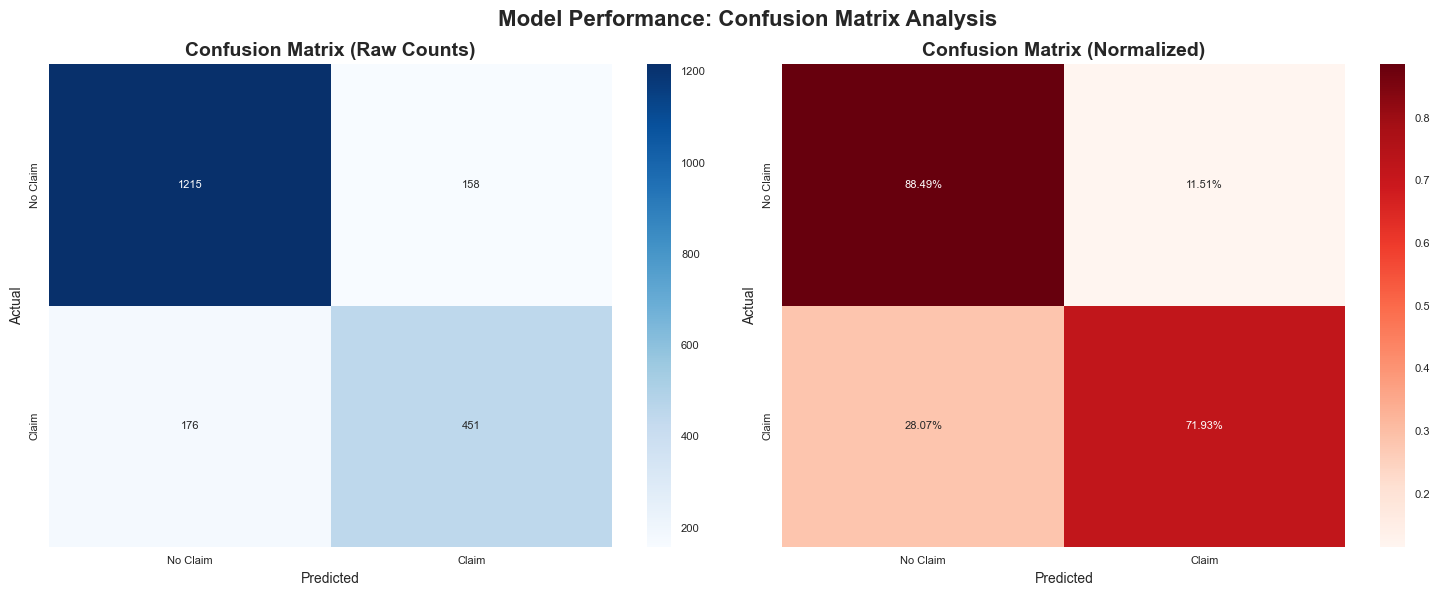

In [74]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log)

# Plot raw and normalized confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Raw counts
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['No Claim', 'Claim'],
            yticklabels=['No Claim', 'Claim'])
ax1.set_title('Confusion Matrix (Raw Counts)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Normalized (percentages)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='Reds', ax=ax2,
            xticklabels=['No Claim', 'Claim'],
            yticklabels=['No Claim', 'Claim'])
ax2.set_title('Confusion Matrix (Normalized)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.suptitle('Model Performance: Confusion Matrix Analysis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [75]:
tn, fp, fn, tp = cm.ravel()

accuracy    = (tp + tn) / cm.sum()
precision   = tp / (tp + fp)
recall      = tp / (tp + fn)      
specificity = tn / (tn + fp)
f1          = 2 * (precision * recall) / (precision + recall)

print("="*60)
print("LOGISTIC REGRESSION PERFORMANCE")
print("="*60)
print(f"Accuracy:    {accuracy:.3f} ({accuracy*100:.1f}%)")
print(f"Precision:   {precision:.3f} ({precision*100:.1f}%)")
print(f"Recall:      {recall:.3f} ({recall*100:.1f}%)")
print(f"Specificity: {specificity:.3f} ({specificity*100:.1f}%)")
print(f"F1-Score:    {f1:.3f} ({f1*100:.1f}%)")
print()
print("Confusion Matrix Breakdown:")
print(f"  True Negatives (TN):  {tn:,}")
print(f"  False Positives (FP): {fp:,}")
print(f"  False Negatives (FN): {fn:,}")
print(f"  True Positives (TP):  {tp:,}")
print("="*60)

LOGISTIC REGRESSION PERFORMANCE
Accuracy:    0.833 (83.3%)
Precision:   0.741 (74.1%)
Recall:      0.719 (71.9%)
Specificity: 0.885 (88.5%)
F1-Score:    0.730 (73.0%)

Confusion Matrix Breakdown:
  True Negatives (TN):  1,215
  False Positives (FP): 158
  False Negatives (FN): 176
  True Positives (TP):  451


**Interpretation:**  
- The model achieves strong performance with accuracy around **83%** and a balanced F1-score.  
- Precision (≈74%) is slightly higher than recall (≈72%), meaning the model is good at flagging risky customers while still capturing most claims.  
- Business-wise, the model correctly identifies many claimants but misses some (false negatives) and wrongly flags some low-risk customers (false positives).  

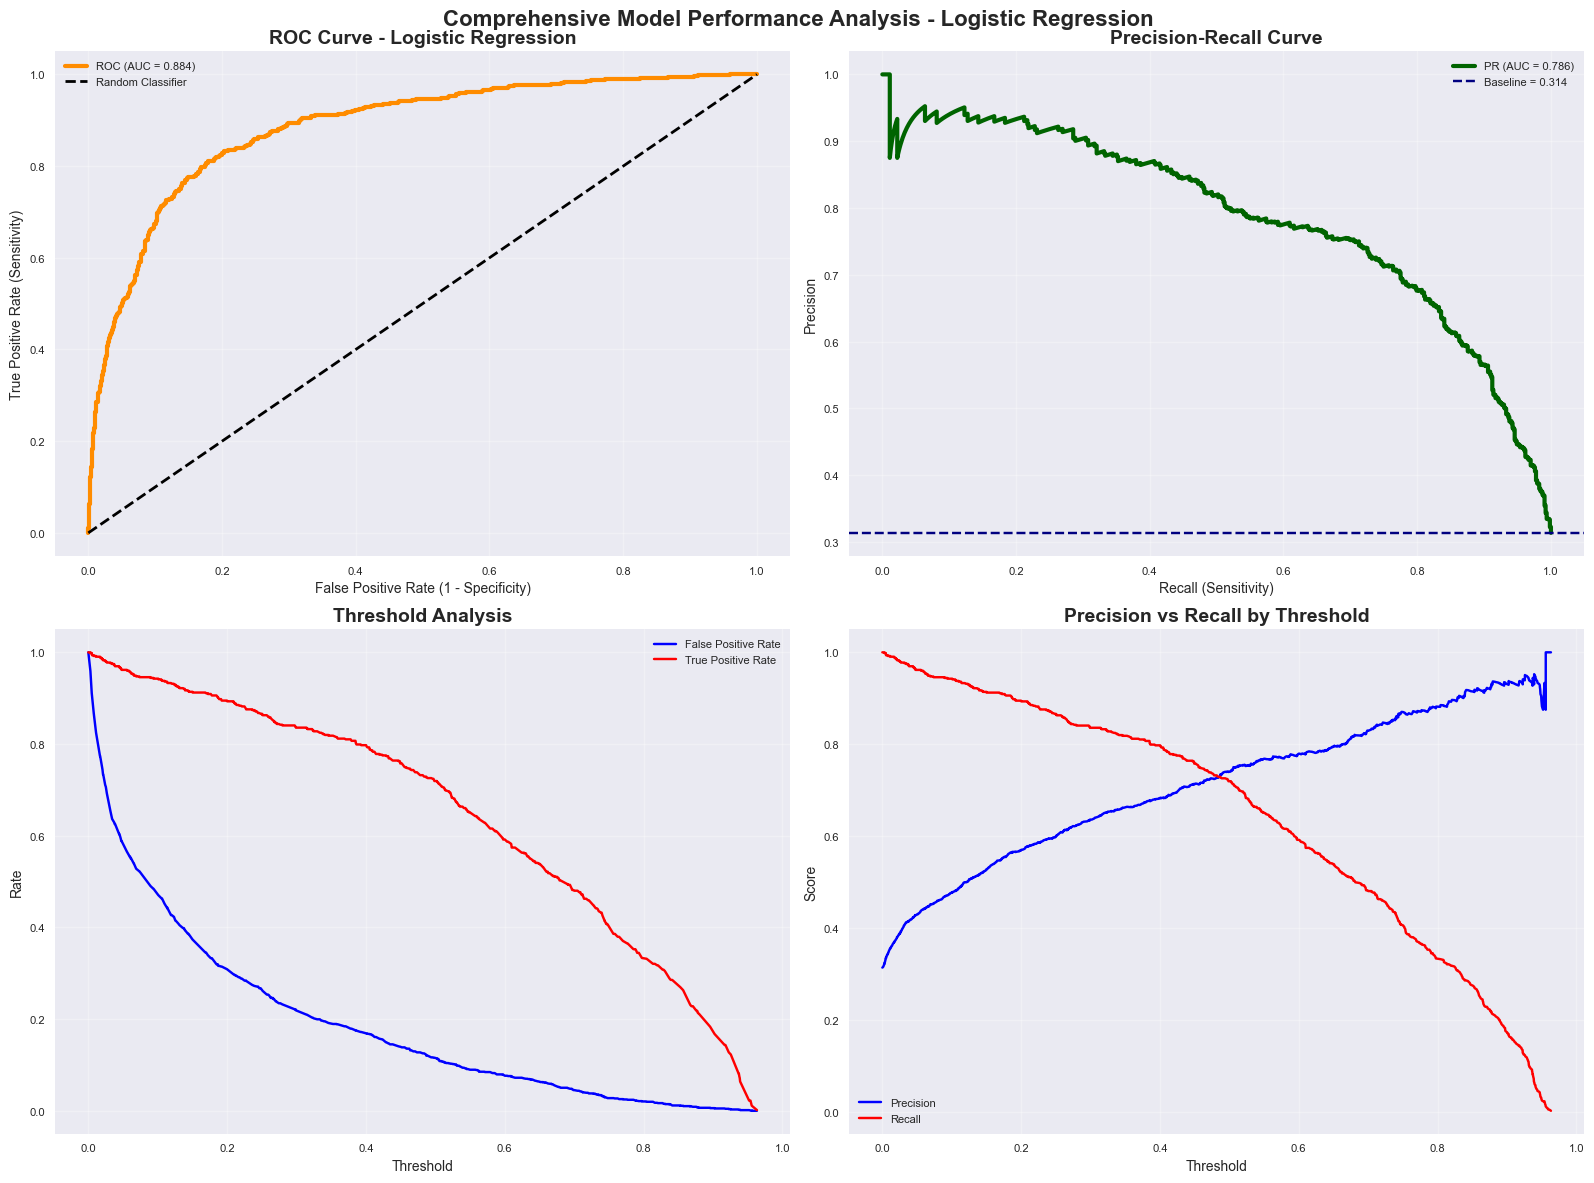

In [76]:
# ROC, Precision-Recall, and Threshold Analysis

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_log)
roc_auc = auc(fpr, tpr)

# PR curve
precision_vals, recall_vals, pr_thresholds = precision_recall_curve(y_test, y_proba_log)
pr_auc = auc(recall_vals, precision_vals)

# Create combined visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. ROC curve
ax1.plot(fpr, tpr, color='darkorange', lw=3, label=f'ROC (AUC = {roc_auc:.3f})')
ax1.plot([0,1], [0,1], 'k--', lw=2, label='Random Classifier')
ax1.set_title('ROC Curve - Logistic Regression', fontsize=14, fontweight='bold')
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.legend()
ax1.grid(alpha=0.3)

# 2. Precision-Recall curve
ax2.plot(recall_vals, precision_vals, color='darkgreen', lw=3, label=f'PR (AUC = {pr_auc:.3f})')
ax2.axhline(y=y_test.mean(), color='navy', linestyle='--', label=f'Baseline = {y_test.mean():.3f}')
ax2.set_title('Precision-Recall Curve', fontsize=14, fontweight='bold')
ax2.set_xlabel('Recall (Sensitivity)')
ax2.set_ylabel('Precision')
ax2.legend()
ax2.grid(alpha=0.3)

# 3. Threshold analysis: FPR vs TPR
ax3.plot(thresholds, fpr, 'b-', label='False Positive Rate')
ax3.plot(thresholds, tpr, 'r-', label='True Positive Rate')
ax3.set_title('Threshold Analysis', fontsize=14, fontweight='bold')
ax3.set_xlabel('Threshold')
ax3.set_ylabel('Rate')
ax3.legend()
ax3.grid(alpha=0.3)

# 4. Precision vs Recall by threshold
ax4.plot(pr_thresholds, precision_vals[:-1], 'b-', label='Precision')
ax4.plot(pr_thresholds, recall_vals[:-1], 'r-', label='Recall')
ax4.set_title('Precision vs Recall by Threshold', fontsize=14, fontweight='bold')
ax4.set_xlabel('Threshold')
ax4.set_ylabel('Score')
ax4.legend()
ax4.grid(alpha=0.3)

plt.suptitle('Comprehensive Model Performance Analysis - Logistic Regression', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [78]:
# Print detailed analysis
print("="*60)
print("ROC CURVE ANALYSIS")
print("="*60)
print(f"AUC Score: {roc_auc:.3f}")
print(f"Model Performance: {'Excellent' if roc_auc >= 0.9 else 'Good' if roc_auc >= 0.8 else 'Fair' if roc_auc >= 0.7 else 'Poor'}")
print()

print("PRECISION-RECALL ANALYSIS")
print(f"PR-AUC Score: {pr_auc:.3f}")
print(f"Baseline (Prevalence): {y_test.mean():.3f}")
print()

print("="*60)

ROC CURVE ANALYSIS
AUC Score: 0.884
Model Performance: Good

PRECISION-RECALL ANALYSIS
PR-AUC Score: 0.786
Baseline (Prevalence): 0.314



**Interpretation**

Beyond accuracy, ROC and PR curves provide deeper insights into model discrimination:  
- **ROC Curve (AUC = 0.884)**: Good ability to separate claim vs no-claim customers.  
- **Precision-Recall Curve (PR-AUC = 0.786)**: Outperforms the baseline prevalence (31%).  
- **Threshold Analysis**: Highlights trade-offs between capturing more claims (recall) and avoiding false alarms (precision).  


### **Summary of Logistic Regression**
The Logistic Regression model achieved:  
- **Accuracy**: 83%  
- **Precision**: 74%  
- **Recall**: 72%  
- **F1-Score**: 73%  
- **ROC AUC**: 0.88  
- **PR AUC**: 0.79  

Overall, the model demonstrates good discrimination ability and a solid baseline for comparison with more complex models such as Random Forest or Gradient Boosting.  

---

## **Model 2: Random Forest**
Why Random Forest?  
- A powerful ensemble method based on decision trees.  
- Captures **non-linear relationships** and **feature interactions**.  
- Handles categorical features encoded as integers without one-hot encoding.  
- Provides **feature importance scores**, which make it easier to interpret what drives predictions.  

In [79]:
# Initialize and train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200, 
    max_depth=None, 
    random_state=42,
    class_weight="balanced"
)
# Train model
rf_model.fit(X_tree_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_tree_test)
y_proba_rf = rf_model.predict_proba(X_tree_test)[:,1]

In [80]:
# Calculate performance metrics
rf_accuracy  = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall    = recall_score(y_test, y_pred_rf)
rf_f1        = f1_score(y_test, y_pred_rf)
rf_auc       = roc_auc_score(y_test, y_proba_rf)

print("="*60)
print("RANDOM FOREST PERFORMANCE")
print("="*60)
print(f"Accuracy:   {rf_accuracy:.3f} ({rf_accuracy*100:.1f}%)")
print(f"Precision:  {rf_precision:.3f} ({rf_precision*100:.1f}%)")
print(f"Recall:     {rf_recall:.3f} ({rf_recall*100:.1f}%)")
print(f"F1-Score:   {rf_f1:.3f} ({rf_f1*100:.1f}%)")
print(f"ROC AUC:    {rf_auc:.3f}")
print("="*60)

RANDOM FOREST PERFORMANCE
Accuracy:   0.806 (80.6%)
Precision:  0.713 (71.3%)
Recall:     0.638 (63.8%)
F1-Score:   0.673 (67.3%)
ROC AUC:    0.857


**Interpretation**

The model achieves a accuracy of 80,6%, but with a lower recall of 63,8% compared to the precision of 71,3%. This means that the model is a bit more conservative; it is better at confirming claims when it first predicts claim, but it overlooks a good portion of actual claims (look at cm).

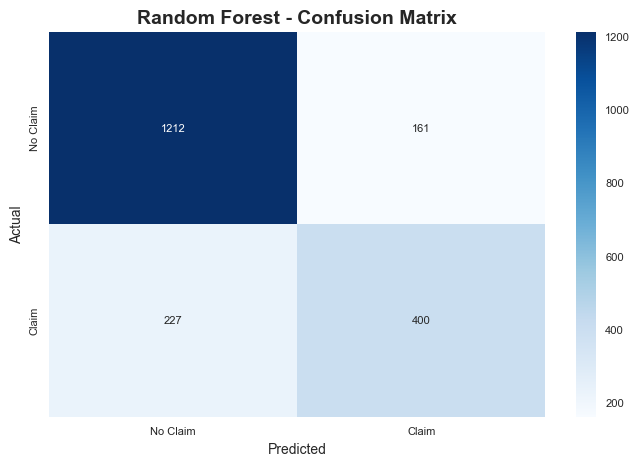

CONFUSION MATRIX ANALYSIS:
  True Negatives (TN):  1,212
  False Positives (FP): 161
  False Negatives (FN): 227
  True Positives (TP):  400
  Specificity: 0.883 (88.3%)


In [81]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Claim', 'Claim'],
            yticklabels=['No Claim', 'Claim'])
plt.title("Random Forest - Confusion Matrix", fontsize=14, fontweight="bold")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Breakdown
tn, fp, fn, tp = cm_rf.ravel()
specificity = tn / (tn + fp)

print("CONFUSION MATRIX ANALYSIS:")
print(f"  True Negatives (TN):  {tn:,}")
print(f"  False Positives (FP): {fp:,}")
print(f"  False Negatives (FN): {fn:,}")
print(f"  True Positives (TP):  {tp:,}")
print(f"  Specificity: {specificity:.3f} ({specificity*100:.1f}%)")

**Interpretation**

- The model is good at identifying low-risk customers (TN = 1212, specificity = 88,3%).
- It captures 400 claims correctly, but misses 227 claims (FN).
- It labels 161 customers wrongly as risk-customers (FP).

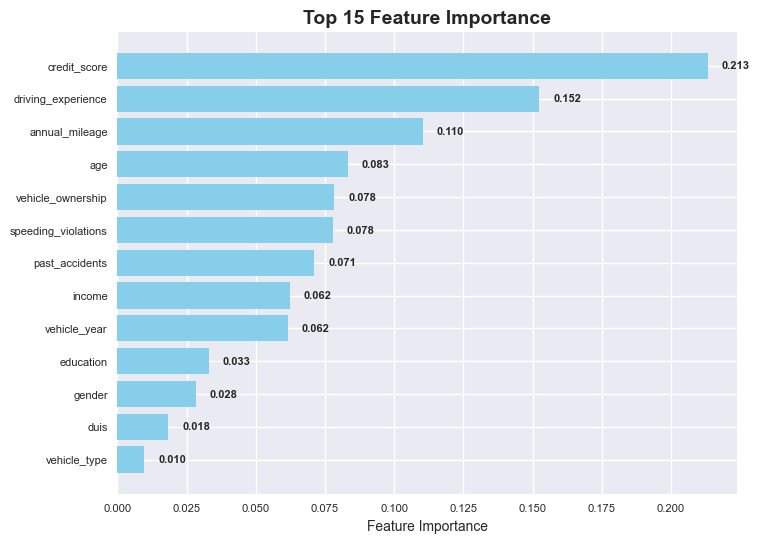

In [82]:
# Feature Importance Analysis
importance_df = (
    pd.DataFrame({
        "feature": X_tree_train.columns,
        "importance": rf_model.feature_importances_
    })
    .sort_values("importance", ascending=False)
)

# Plot top 15
top_features = importance_df.head(15)
plt.figure(figsize=(8,6))
bars = plt.barh(top_features["feature"], top_features["importance"], color="skyblue")
plt.title("Top 15 Feature Importance", fontsize=14, fontweight="bold")
plt.xlabel("Feature Importance")

# Annotate bars
for bar, val in zip(bars, top_features["importance"]):
    plt.text(val+0.005, bar.get_y()+bar.get_height()/2, f"{val:.3f}", va="center", fontweight="bold")

plt.gca().invert_yaxis()
plt.show()



**Interpretation**

- According to the feature importance analysis, the most important features are `credit_score` (0.213), `driving_experience` (0.152), and `annual_mileage` (0.110)
- This is a somewhat match to the EDA, but we would expect age also to be a bit higher up.
- As also seen in the EDA; DUIs have a low impact on the model

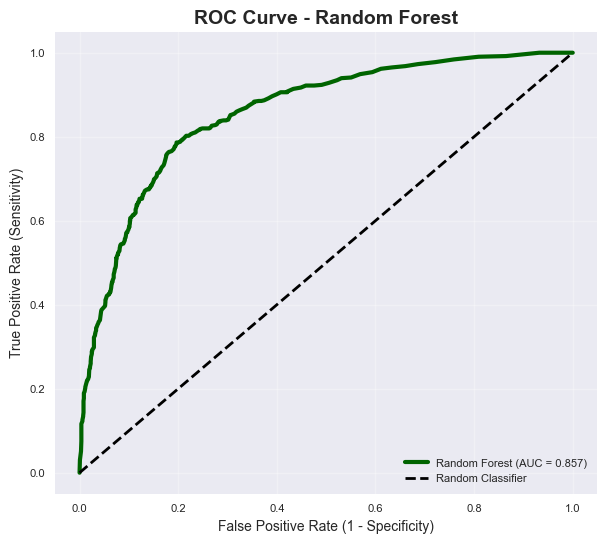

In [83]:
# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(7,6))
plt.plot(fpr_rf, tpr_rf, color="darkgreen", lw=3, label=f"Random Forest (AUC = {rf_auc:.3f})")
plt.plot([0,1], [0,1], "k--", lw=2, label="Random Classifier")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve - Random Forest", fontsize=14, fontweight="bold")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


**Interpretation**
- ROC AUC = 0.857 gives the model a good discrimination abillity, but is a bit weaker than the LogReg-model (0.884)
- The curve has a good distance from the baseline, but it is not totally perfect either.

### **Summary of Random Forest**
The Random Forest model achieved:
- Accuracy: 81%
- Precision: 71%
- Recall: 64%
- F1-Score: 67%
- ROC AUC: 0.86

Overall, the model shows good discrimination ability, with slightly lower performance than Logistic Regression, but offers valuable insights through feature importance.

---

## **Comparison & Overall Summary**
After the training and evaluating of both models, we can now compare their performance side by side. 

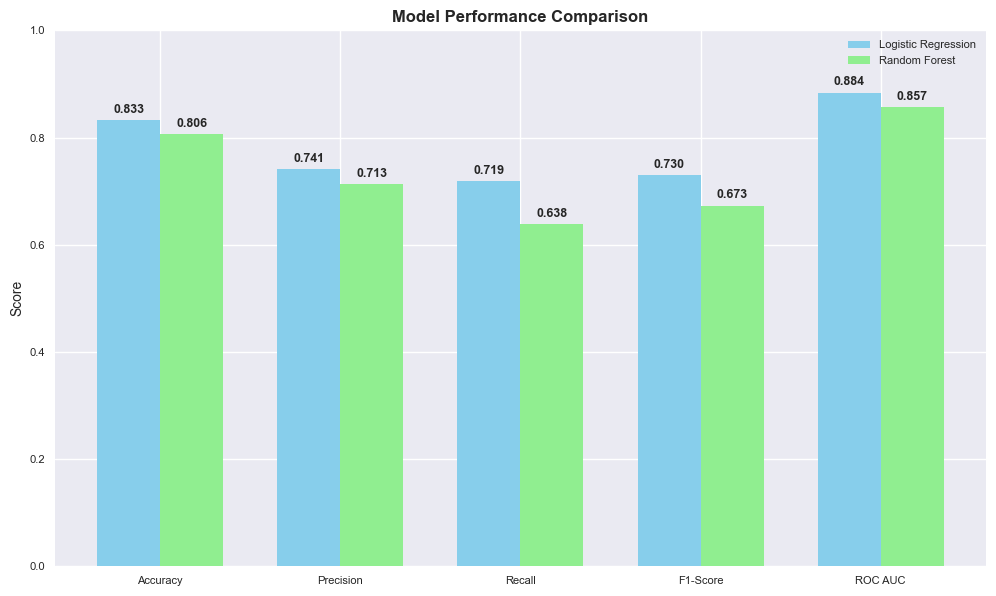

In [85]:
# Metrics
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC AUC"]
logit_scores = [0.833, 0.741, 0.719, 0.730, 0.884]
rf_scores = [0.806, 0.713, 0.638, 0.673, 0.857]

x = np.arange(len(metrics))  # metric indices
width = 0.35                 # bar width

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, logit_scores, width, label="Logistic Regression", color="skyblue")
bars2 = ax.bar(x + width/2, rf_scores, width, label="Random Forest", color="lightgreen")

# Add labels and title
ax.set_ylabel("Score")
ax.set_title("Model Performance Comparison")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.legend()

# Annotate bars with values
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.3f}", 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # offset
                    textcoords="offset points",
                    ha="center", va="bottom", fontsize=9, fontweight="bold")

plt.tight_layout()
plt.show()

| Metric        | Logistic Regression | Random Forest |
|---------------|---------------------|---------------|
| Accuracy      | **0.833** (83.3%)   | 0.806 (80.6%) |
| Precision     | 0.741 (74.1%)       | 0.713 (71.3%) |
| Recall        | 0.719 (71.9%)       | 0.638 (63.8%) |
| F1-Score      | 0.730 (73.0%)       | 0.673 (67.3%) |
| ROC AUC       | **0.884**           | 0.857         |

**Key Takeaways:**
- Logistic Regression outperformed Random Forest across all key metrics, especially recall and AUC.  
- Random Forest, while weaker in overall predictive performance, provided valuable insights through feature importance, highlighting `credit_score`, `driving_experience`, and `annual_mileage` as top predictors.  
- This shows that a simpler model (Logistic Regression) can sometimes outperform more complex models in predictive accuracy, while ensemble models remain useful for interpretability and potential future improvements (e.g., boosting, hyperparameter tuning). 
